# Neural Network Classification

In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as sk
import sklearn.metrics as skm
import matplotlib
import gzip, pickle

# Display plots inline and change default figure size
%matplotlib inline

## Binary Neural Network Classifier on XOR data

In [2]:
# input
X = np.array([[0,0], [0,1], [1,0], [1,1]])
# output
y = np.array([[0], [1], [1], [0]])

In [3]:
# input dimension
D = 2 
# number of neurons in hidden layer
N = 3 
# binary output class 
K = 1
# learning rate
l_r = .1
epochs = 50000

In [4]:
np.random.seed(1)
# weight at hidden layer 
w_0 = np.random.uniform(size=(D, N))
# weight at output layer
w_1 = np.random.uniform(size=(N, K))

In [5]:
def sigmoid(x):  
    ''' Sigmoid function '''
    
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):  
    ''' Derivative of sigmoid function '''
    
    return sigmoid(x) * (1-sigmoid (x))

[-0.08361069]
[0.00669058]
[0.00580568]
[0.02891543]
[0.04851653]
[0.02891572]
[0.00170729]
[0.00048206]
[0.00020702]
[0.00010569]


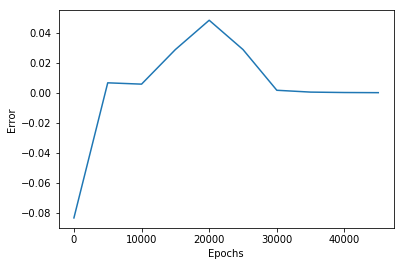

In [6]:
errors = []
epoch_list = []
for epoch in range(epochs):
 
    # Forward pass
    # activation at hidden layer
    z0 = np.dot(X, w_0)
    a0 = sigmoid(z0)
    z1 = np.dot(a0, w_1)
    
    # Calculate error
    error = y - z1
    
    if epoch % 5000 == 0:
        print(sum(error))
        errors.append(sum(error))
        epoch_list.append(epoch)

    # Backward pass
    d_z1 = error * l_r
    w_1 += a0.T.dot(d_z1)
    
    d_z0 = d_z1.dot(w_1.T) * sigmoid_derivative(a0)
    w_0 += X.T.dot(d_z0)
    
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(epoch_list, errors)
plt.show()

The convergence criteria here is number of epochs because of the computation limitations. As we can observe here the error tries ot get closer to 0 with each epoch. 

In [7]:
X_test = [0, 1]

# predict X_test
z0 = np.dot(X_test, w_0)
a_l = sigmoid(z0)
z1 = np.dot(a_l, w_1)
z1

array([0.99978893])

The predicted probability is 0.999 which is very close to 1 and that is what we expected our output to be.

# MNIST data

In [8]:
# reading the input file
with gzip.open('mnist_rowmajor.pkl.gz', 'rb') as data_fh:
    data = pickle.load(data_fh, encoding='latin1')

In [9]:
# creating numpy arrays of training and testing data
train_images = data['images_train']
train_labels = data['labels_train']
test_images = data['images_test']
test_labels = data['labels_test']

In [10]:
# splitting train data into train and dev sets
int_train_images, int_dev_images, int_train_labels, int_dev_labels = sk.train_test_split(train_images, train_labels, 
                                                                                         test_size=0.15, random_state=42)

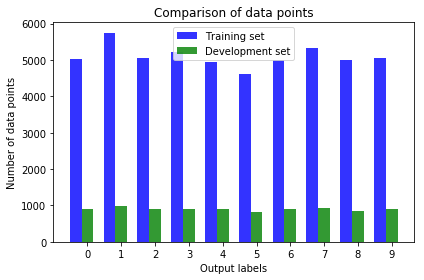

In [11]:
# visualizing train and dev sets
train_items, train_count = np.unique(int_train_labels, return_counts=True)
dev_items, dev_count = np.unique(int_dev_labels, return_counts=True)

# create plot
fig, ax = plt.subplots()
index = np.arange(len(dev_items))
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, train_count, bar_width,
alpha=opacity,
color='b',
label='Training set')
 
rects2 = plt.bar(index + bar_width, dev_count, bar_width,
alpha=opacity,
color='g',
label='Development set')
 
plt.xlabel('Output labels')
plt.ylabel('Number of data points')
plt.title('Comparison of data points')
plt.xticks(index + bar_width, (dev_items))
plt.legend()
 
plt.tight_layout()
plt.show()

## Multiclass Neural Network Classifier on MNIST data

In [12]:
def one_hot(y_data, K):
    ''' Represent labels in one hot vectors '''
    
    one_hot_labels = np.zeros((len(y_data), K))
    for i in range(len(y_data)):  
        one_hot_labels[i, y_data[i]] = 1
    return one_hot_labels

In [13]:
def cross_entropy(y_hat, y):
    ''' Cross entropy loss function '''
    
    l = - np.sum(y * np.log(y_hat))
    return l

In [14]:
def softmax(A):
    ''' Softmax function '''
    
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

In [15]:
def relu(x):
    ''' ReLU function '''
    
    return np.maximum(0, x)

def relu_derivative(x):
    ''' Derivative of ReLU function '''
    
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

In [16]:
def tanh(x):
    ''' Tanh function '''
    
    return np.tanh(x)

def tanh_derivative(x):
    ''' Derivative of tanh function '''
    
    return 1 - np.tanh(x) ** 2

In [17]:
class NeuralNetwork:

    def __init__(self, K, D, N, f0, epochs, learning_rate, n_batches):

        # reproduce the same initial weights at each execution
        np.random.seed(42)
        # number of labels
        self.K = K
        # number of features or input dimension
        self.D = D
        # number of neurons in the hidden layer
        self.N = N
        # name of activation function
        self.f0 = f0
        # w0 - weights between input and hidden layer
        # w1 - weights between hidden layer and output layer
        self.w0, self.w1 = self.initialize_weights()
        # number of iteration - convergence criteria
        self.epochs = epochs
        # constant learning rate
        self.learning_rate = learning_rate
        # batch size - number of samples that will be propagated through the network.
        self.n_batches = n_batches
    
    
    def initialize_weights(self):
        ''' Function to initialize weights '''
        
        # the size is set to number of neurons x 785 (784 input features + bias)
        w0 = np.random.uniform(-1.0, 1.0, size=self.N * (self.D + 1))
        w0 = w0.reshape(self.N, self.D + 1)
        # similarly size is number of classes x (number of neurons + 1) 
        w1 = np.random.uniform(-1.0, 1.0, size=self.K * (self.N + 1))
        w1 = w1.reshape(self.K, self.N + 1)
        return w0, w1

    
    def add_bias(self, X, how='column'):
        ''' Function to add bias '''
        
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1] + 1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0] + 1, X.shape[1]))
            X_new[1:, :] = X
        return X_new

    
    def forward_pass(self, X):
        ''' Forward pass function '''
        
        ## Hidden Layer
        
        net_input = self.add_bias(X, how='column')
        z0 = self.w0.dot(net_input.T)
        if self.f0 == 'relu':
            a0 = relu(z0)
        elif self.f0 == 'tanh':
            a0 = tanh(z0)
        else:
            a0 = sigmoid(z0)
    
        ## Output layer
        
        a0 = self.add_bias(a0, how='row')
        z1 = self.w1.dot(a0)
        a1 = sigmoid(z1)
        
        return net_input, z0, a0, z1, a1
    
    
    def backward_pass(self, net_input, z0, a0, a1, y):
        ''' Backward pass function '''
        
        # calculate error at output layer
        E = a1 - y
        z0 = self.add_bias(z0, how='row')
        
        if self.f0 == 'relu':
            d_z0 = self.w1.T.dot(E) * relu_derivative(z0)
        elif self.f0 == 'tanh':
            d_z0 = self.w1.T.dot(E) * tanh_derivative(z0)
        else:
            d_z0 = self.w1.T.dot(E) * sigmoid_derivative(z0)
        d_z0 = d_z0[1:, :]
        
        # gradient with respect to input
        grad1 = d_z0.dot(net_input)
        # gradient with respect to a0
        grad2 = E.dot(a0.T)
        
        return grad1, grad2

    
    def error(self, y, output):
        ''' Function to calculate cross entropy loss '''
        
        err = cross_entropy(output, y)
        return 0.5 * np.mean(err)

    
    def backprop_step(self, X, y):
        ''' Backpropagation function '''
        
        # forward pass
        net_input, z0, a0, z1, a1 = self.forward_pass(X)
        y = y.T

        # backward pass
        grad1, grad2 = self.backward_pass(net_input, z0, a0, a1, y)
        
        # calculate error
        err = self.error(y, a1)
        
        return err, grad1, grad2

    
    def fit(self, X, y):
        ''' Function to train model '''
        
        self.err = []
        self.epoch_list = []
        X_data, y_data = X.copy(), y.copy()
        # representing actual outputs in one hot vector 
        y_data_enc = one_hot(y_data, self.K)
        
        # gradient descent
        for i in range(self.epochs):

            X_mb = np.array_split(X_data, self.n_batches)
            y_mb = np.array_split(y_data_enc, self.n_batches)
            
            epoch_errors = []
            
            for Xi, yi in zip(X_mb, y_mb):
                
                # calculate gradients
                err, grad1, grad2 = self.backprop_step(Xi, yi)
                epoch_errors.append(err)
                
                # update weights
                self.w0 -= (self.learning_rate * grad1)
                self.w1 -= (self.learning_rate * grad2)
            
            if i % 50 == 0:
                self.err.append(np.mean(epoch_errors))
                self.epoch_list.append(i)
                print(np.mean(epoch_errors))
        
        return self
    
    
    def predict(self, X):
        ''' Function to predict output class '''
        
        Xt = X.copy()
        # get probabilities of each input for each class
        prob = self.predict_proba(Xt)
        
        y_hat = list()
        # assign the class having the maximum probability to input instance
        for i in prob:
            y_hat.append([np.argmax(i)])
        
        return np.array(y_hat)
    
    
    def predict_proba(self, X):
        ''' Function to get probabilities of all the inputs for all the classes '''
        
        Xt = X.copy()
        net_input, z0, a0, z1, a1 = self.forward_pass(Xt)
        return softmax(a1.T)

In [18]:
# input dimension
D = 784
# number of output classes
K = 10

# array for storing errors at different configurations
config_errors = []
# array for storing accuracies at different configurations
config_accuracies = []

#### Confiuration 1 - 50 neurons in the hidden layer and sigmoid activation function at hidden layer

In [19]:
nn1 = NeuralNetwork(K=K, D=D, N=50, f0='sigmoid', epochs=300, learning_rate=0.001, n_batches=1000)
# train model
nn1.fit(int_train_images, int_train_labels)

34.23504545522921
5.1047023085040815
3.5907225153941034
2.833485866991773
2.3530234167345307
1.9971993401615087


The convergence criteria used is number of epochs = 300. The error can further be reduced by increasing the number of epochs but because of computation limitation I have set the epochs to 300 and the error is reduced from 34.235 to 1.9971

Plot errors at epoch interval of 50

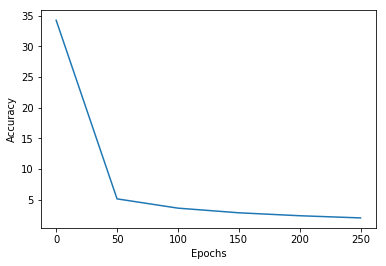

In [20]:
config_errors.append(nn1.err[-1]) 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(nn1.epoch_list, nn1.err)
plt.show()

Error is decreasing with increasing number of epochs.

In [21]:
# accuracy of the training data
y_hat1 = nn1.predict(int_train_images)
accuracy1 = skm.accuracy_score(int_train_labels, y_hat1)
print('Train Accuracy: {}'.format(accuracy1))

Train Accuracy: 0.9891960784313726


Train accuracy is calculated in order to show the correctness of the model implementation which is 98.91% which is very high.

In [22]:
# accuracy of dev data
y_hat1 = nn1.predict(int_dev_images)
accuracy1 = skm.accuracy_score(int_dev_labels, y_hat1)
config_accuracies.append(accuracy1)
print('Test Accuracy: {}'.format(accuracy1))

Test Accuracy: 0.9604444444444444


Accuracy on dev set is 96.04% which is also very high. So we can say that neural networks give better accuracy than the models we did in earlier assignments.

#### Confiuration 2 - 50 neurons in the hidden layer and tanh activation function at hidden layer

In [23]:
nn2 = NeuralNetwork(K=K, D=D, N=50, f0='tanh', epochs=300, learning_rate=0.001, n_batches=1000)
# train model
nn2.fit(int_train_images, int_train_labels)

30.292318687340863
4.414210154524478
3.1244109102504023
2.4938901076225393
2.078943879487736
1.7950453209137809


Changing the activation function has lowered the error to 1.79

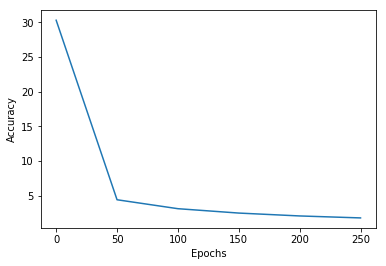

In [24]:
# plot errors at interval of 50 epochs
config_errors.append(nn2.err[-1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(nn2.epoch_list, nn2.err)
plt.show()

Error is decreasing with increasing number of epochs.

In [25]:
# accuracy at train data
y_hat2 = nn2.predict(int_train_images)
accuracy2 = skm.accuracy_score(int_train_labels, y_hat2)
print('Train Accuracy: {}'.format(accuracy2))

Train Accuracy: 0.9900196078431373


This time we get a better model which has about 99% accuracy on train data.

In [26]:
# accuracy at dev data
y_hat2 = nn2.predict(int_dev_images)
accuracy2 = skm.accuracy_score(int_dev_labels, y_hat2)
config_accuracies.append(accuracy2)
print('Test Accuracy: {}'.format(accuracy2))

Test Accuracy: 0.9508888888888889


But as we see here the accuracy on dev data is decreased to 95% which is still very high.

#### Confiuration 3 - 50 neurons in the hidden layer and ReLU activation function at hidden layer

In [27]:
nn3 = NeuralNetwork(K=K, D=D, N=50, f0='relu', epochs=300, learning_rate=0.001, n_batches=1000)
# train model
nn3.fit(int_train_images, int_train_labels)

30.545665189316562
3.649980359115937
2.51071267520673
1.902938788046942
1.4718089279283355
1.1400437448566132


Error has decreased more here to 1.14

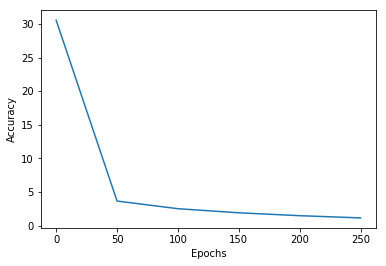

In [28]:
# plot errors at interval of 50 epochs
config_errors.append(nn3.err[-1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(nn3.epoch_list, nn3.err)
plt.show()

Error is decreasing with increasing number of epochs.

In [29]:
# accuracy at train data
y_hat3 = nn3.predict(int_train_images)
accuracy3 = skm.accuracy_score(int_train_labels, y_hat3)
print('Train Accuracy: {}'.format(accuracy3))

Train Accuracy: 0.9946274509803922


Accuracy on train data is 99.46% 

In [30]:
# accuracy at test data
y_hat3 = nn3.predict(int_dev_images)
accuracy3 = skm.accuracy_score(int_dev_labels, y_hat3)
config_accuracies.append(accuracy3)
print('Test Accuracy: {}'.format(accuracy3))

Test Accuracy: 0.9643333333333334


Dev data accuracy using ReLU function is 96.43% which is higher than the above 2 activation functions.

#### Confiuration 4 - 75 neurons in the hidden layer and sigmoid activation function at hidden layer

In [31]:
nn4 = NeuralNetwork(K=K, D=D, N=75, f0='sigmoid', epochs=300, learning_rate=0.001, n_batches=1000)
# train model
nn4.fit(int_train_images, int_train_labels)

32.02692222841036
4.400810757240635
2.9174871765370742
2.1773089128255805
1.6954498940468437
1.3561182357269301


Here we have increased the number of neurons in the hidden layer to 75. The error after 300 epochs with sigmoid function in the hidden layer is 1.35 

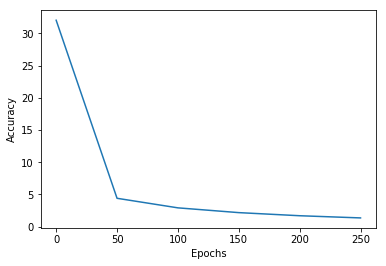

In [32]:
# plot errors at interval of 50 epochs
config_errors.append(nn4.err[-1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(nn4.epoch_list, nn4.err)
plt.show()

Error is decreasing with increasing number of epochs.

In [33]:
# accuracy at train data
y_hat4 = nn4.predict(int_train_images)
accuracy4 = skm.accuracy_score(int_train_labels, y_hat4)
print('Train Accuracy: {}'.format(accuracy4))

Train Accuracy: 0.9939803921568627


Train accuracy in this case is 99.39% 

In [34]:
# accuracy at test data
y_hat4 = nn4.predict(int_dev_images)
accuracy4 = skm.accuracy_score(int_dev_labels, y_hat4)
config_accuracies.append(accuracy4)
print('Test Accuracy: {}'.format(accuracy4))

Test Accuracy: 0.9653333333333334


Accuracy 96.53% on dev data is higher than the earlier configurations. 

#### Confiuration 5 - 75 neurons in the hidden layer and tanh activation function at hidden layer

In [35]:
nn5 = NeuralNetwork(K=K, D=D, N=75, f0='tanh', epochs=300, learning_rate=0.001, n_batches=1000)
# train model
nn5.fit(int_train_images, int_train_labels)

30.40080032279279
3.8072102977359457
2.42929257827872
1.7330186167115575
1.3037834727056723
1.0034807477462402


The error here has decreased to 1.003

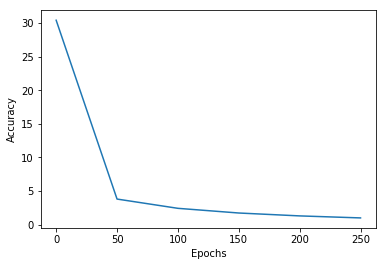

In [36]:
# plot errors at interval of 50 epochs
config_errors.append(nn5.err[-1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(nn5.epoch_list, nn5.err)
plt.show()

Error is decreasing with increasing number of epochs.

In [37]:
# accuracy at train data
y_hat5 = nn5.predict(int_train_images)
accuracy5 = skm.accuracy_score(int_train_labels, y_hat5)
print('Train Accuracy: {}'.format(accuracy5))

Train Accuracy: 0.996078431372549


In [38]:
# accuracy at dev data
y_hat5 = nn5.predict(int_dev_images)
accuracy5 = skm.accuracy_score(int_dev_labels, y_hat5)
config_accuracies.append(accuracy5)
print('Test Accuracy: {}'.format(accuracy5))

Test Accuracy: 0.9548888888888889


Accuracy on dev data in this case is 95.48% lesser than the earlier.

#### Confiuration 6 - 75 neurons in the hidden layer and ReLU activation function at hidden layer

In [39]:
nn6 = NeuralNetwork(K=K, D=D, N=75, f0='relu', epochs=300, learning_rate=0.001, n_batches=1000)
# train model
nn6.fit(int_train_images, int_train_labels)

32.64292188913994
3.0201955161039193
1.8084639828440694
1.1387724360200135
0.6943357326158719
0.402230798562914


Error 0.402 is least here compared to all the above configurations.

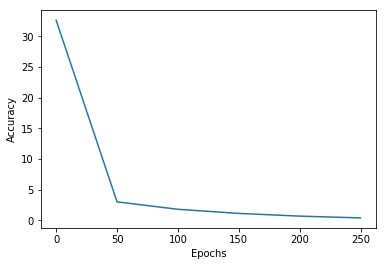

In [40]:
# plot errors at interval of 50 epochs
config_errors.append(nn6.err[-1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(nn6.epoch_list, nn6.err)
plt.show()

Error is decreasing with increasing number of epochs.

In [41]:
# accuracy at train data
y_hat6 = nn6.predict(int_train_images)
accuracy6 = skm.accuracy_score(int_train_labels, y_hat6)
print('Train Accuracy: {}'.format(accuracy6))

Train Accuracy: 0.9994509803921569


Train accuracy is also highest 99.94%.

In [42]:
# accuracy at test data
y_hat6 = nn6.predict(int_dev_images)
accuracy6 = skm.accuracy_score(int_dev_labels, y_hat6)
config_accuracies.append(accuracy6)
print('Test Accuracy: {}'.format(accuracy6))

Test Accuracy: 0.9678888888888889


Accuracy on dev data is also greater 96.78%.

## Comparing configurations

#### Comparing loss of each configuration

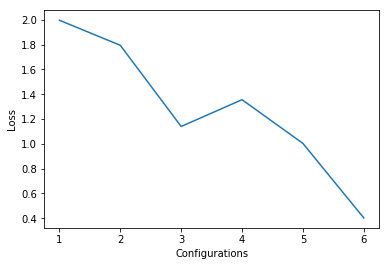

In [43]:
plt.xlabel('Configurations')
plt.ylabel('Loss')
plt.plot([1, 2, 3, 4, 5, 6], config_errors)
plt.show()

As we can clearly observe that loss for the 6th configuration is lowest for 300 epochs.

#### Comparing accuracy of each configuration

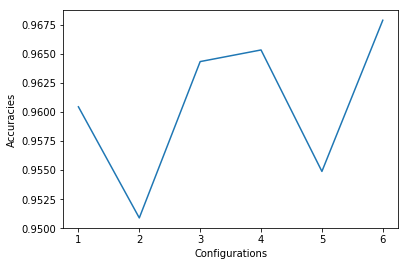

In [44]:
plt.xlabel('Configurations')
plt.ylabel('Accuracies')
plt.plot([1, 2, 3, 4, 5, 6], config_accuracies)
plt.show()

Accuracy also is highest for the 6th configuration for 300 epochs.

Observing the results above we can say that the 6th configuration is best so we will apply that on the full training data.

## Baseline classifier - Perceptron

In [45]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=300, random_state=42)

# Train the perceptron
ppn.fit(train_images, train_labels.ravel())

C:\Users\aishwarya\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=300, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

Below the performance metrics of the above classifier are shown.

In [46]:
# calculate accuracy
y_pred_ppn = ppn.predict(test_images)
accuracy_ppn = skm.accuracy_score(test_labels, y_pred_ppn)
print('Accuracy: {}'.format(accuracy_ppn))

Accuracy: 0.8771


In [47]:
# calculate precision 
precision_ppn = skm.precision_score(test_labels, y_pred_ppn, average=None)
print('Precision: {}'.format(precision_ppn))

Precision: [0.88705234 0.97486535 0.95621302 0.85619678 0.96835443 0.92463768
 0.87487969 0.86576577 0.70779221 0.83268859]


In [48]:
# calculate recall
recall_ppn = skm.recall_score(test_labels, y_pred_ppn, average=None)
print('Recall: {}'.format(recall_ppn))

Recall: [0.98571429 0.95682819 0.78294574 0.8960396  0.7790224  0.71524664
 0.94885177 0.9348249  0.89527721 0.85332012]


In [49]:
# calculate f1 score
f1_score_ppn = skm.f1_score(test_labels, y_pred_ppn, average=None)
print('F1 score: {}'.format(f1_score_ppn))

F1 score: [0.93378444 0.96576256 0.86094832 0.87566522 0.86343115 0.80657396
 0.91036555 0.898971   0.79057117 0.84287812]


In [50]:
# confusion matrix
confusion_matrix_ppn = skm.confusion_matrix(test_labels, y_pred_ppn)
print('Confusion matrix: ')
print(confusion_matrix_ppn)

Confusion matrix: 
[[ 966    0    0    1    0    2    4    4    2    1]
 [   2 1086    2    3    0    1    6    2   32    1]
 [  25    6  808   35    2    3   44   16   89    4]
 [  10    0    7  905    0   10    8   12   44   14]
 [  13    2    9   11  765    5   18   26   36   97]
 [  24    1    0   62    2  638   35   17  101   12]
 [  16    3    4    1    3   17  909    1    4    0]
 [   3    5   11    7    0    0    2  961    4   35]
 [  19    7    3   19    5    9   13   18  872    9]
 [  11    4    1   13   13    5    0   53   48  861]]


## Neural Network 

In [51]:
nn = NeuralNetwork(K=K, D=D, N=75, f0='relu', epochs=300, learning_rate=0.001, n_batches=1000)
# train model
nn.fit(train_images, train_labels)

35.42224566421578
3.428158328942118
2.153960286911094
1.43395384224994
0.9123017441225545
0.5460581255486054


Error is 0.54 after training the full train data set for 300 epochs.

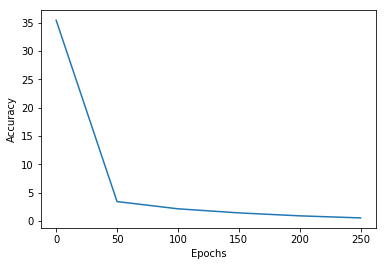

In [52]:
# plot error at interval of 50 epoch
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(nn.epoch_list, nn.err)
plt.show()

Error is decreasing with increasing number of epochs.

In [53]:
# accuracy at train data
y_hat_nn = nn.predict(train_images)
accuracy_nn = skm.accuracy_score(train_labels, y_hat_nn)
print('Train Accuracy: {}'.format(accuracy_nn))

Train Accuracy: 0.9990666666666667


Accuracy of training data is 99.90% which is very high.

In [54]:
# calculate test accuracy
y_hat_nn = nn.predict(test_images)
accuracy_nn = skm.accuracy_score(test_labels, y_hat_nn)
print('Test Accuracy: {}'.format(accuracy_nn))

Test Accuracy: 0.9695


Test data accuracy is 96.95% which is much higher than what we got for standard perceptron.

In [55]:
# calculate precision 
precision_nn = skm.precision_score(test_labels, y_hat_nn, average=None)
print('Precision: {}'.format(precision_nn))

Precision: [0.97376387 0.98678414 0.96525097 0.95988258 0.96833504 0.97058824
 0.97190427 0.9773399  0.95320448 0.96579477]


In [56]:
# calculate recall
recall_nn = skm.recall_score(test_labels, y_hat_nn, average=None)
print('Recall: {}'.format(recall_nn))

Recall: [0.98469388 0.98678414 0.96899225 0.97128713 0.96537678 0.96188341
 0.97494781 0.96498054 0.96201232 0.95143707]


In [57]:
# calculate f1 score
f1_score_nn = skm.f1_score(test_labels, y_hat_nn, average=None)
print('F1 score: {}'.format(f1_score_nn))

F1 score: [0.97919838 0.98678414 0.96711799 0.96555118 0.96685365 0.96621622
 0.97342366 0.9711209  0.95758815 0.95856216]


In [58]:
# confusion matrix
confusion_matrix_nn = skm.confusion_matrix(test_labels, y_hat_nn)
print('Confusion matrix: ')
print(confusion_matrix_nn)

Confusion matrix: 
[[ 965    1    2    1    0    2    5    0    2    2]
 [   0 1120    6    2    0    1    2    1    3    0]
 [   3    0 1000    8    3    1    3    6    8    0]
 [   1    0    9  981    0    8    0    2    5    4]
 [   1    0    2    3  948    0    5    3    5   15]
 [   4    1    0   10    1  858    7    1   10    0]
 [   6    3    2    0    5    5  934    1    2    0]
 [   2    5    7    6    4    1    0  992    3    8]
 [   6    2    4    5    3    6    3    3  937    5]
 [   3    3    4    6   15    2    2    6    8  960]]
